In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
tasks = ['graph', 'node']
models = ['GCN', 'GraphSage', 'GAT']
colors = ['royalblue', 'green','orange']

In [3]:
def load_data(task, model):
    file_name = task+"_"+model+".txt"
    data = np.loadtxt(file_name)
    return data

In [11]:
for i in range(len(tasks)):
    for j in range(len(models)):
        data = load_data(tasks[i], models[j])
        acc_best = np.max(data[:,2])
        print("Task",tasks[i],": The Highest Test Accuracy of model", models[j], "is", acc_best)

Task graph : The Highest Test Accuracy of model GCN is 0.3458
Task graph : The Highest Test Accuracy of model GraphSage is 0.2625
Task graph : The Highest Test Accuracy of model GAT is 0.2729
Task node : The Highest Test Accuracy of model GCN is 0.811
Task node : The Highest Test Accuracy of model GraphSage is 0.796
Task node : The Highest Test Accuracy of model GAT is 0.779


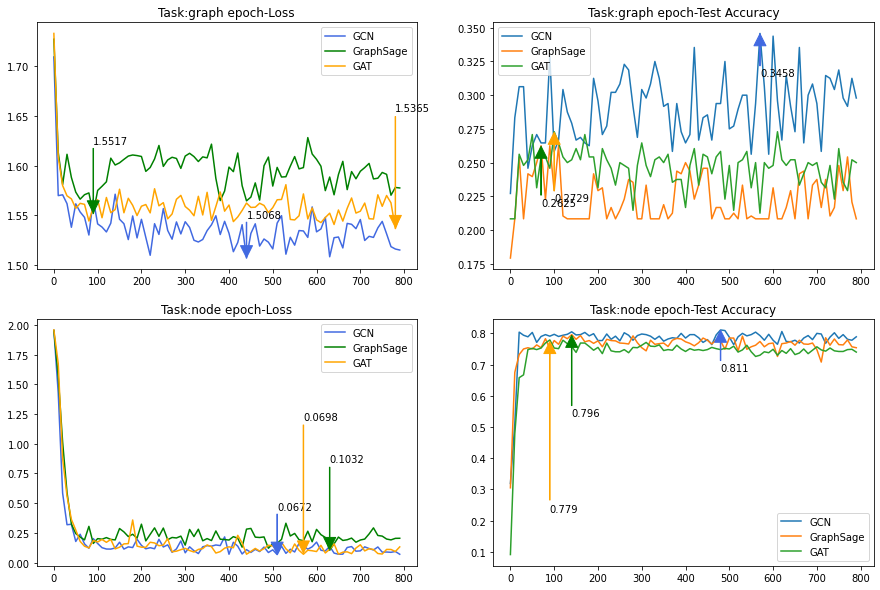

In [62]:
plt.figure(figsize=(15,10))
for i in range(len(tasks)):
    plt.subplot(2,2,2*i+1)
    for j in range(len(models)):
        data = load_data(tasks[i], models[j])
        plt.plot(data[:,0], data[:,1], label=models[j], color=colors[j])
        best = np.min(data[:,1])
        id_best =  np.argmin(data[:,1])
        xy=(data[:,0][id_best], data[:,1][id_best])
        dist = (j+1)*0.8*(np.max(data[:,1]) - best) / 4
        plt.annotate(str(best), xy=xy, 
                     xytext=(xy[0],xy[1]+dist),arrowprops=dict(color=colors[j],shrink=0.01, width=0.5))
    plt.title("Task:"+tasks[i]+" epoch-Loss")
    plt.legend()
for i in range(len(tasks)):
    plt.subplot(2,2,2*i+2)
    for j in range(len(models)):
        data = load_data(tasks[i], models[j])
        plt.plot(data[:,0], data[:,2], label=models[j])
        best = np.max(data[:,2])
        id_best =  np.argmax(data[:,2])
        xy=(data[:,0][id_best], data[:,2][id_best])
        dist = (j+1)*0.8*(np.max(data[:,2]) - np.min(data[:,2])) / 3
        plt.annotate(str(best), xy=xy, 
                     xytext=(xy[0],xy[1]-dist),arrowprops=dict(color=colors[j],shrink=0.01, width=0.5))
    plt.title("Task:"+tasks[i]+" epoch-Test Accuracy")
    plt.legend()